# Softmax regression
: 로지스틱 회귀의 일반화, 다중 클래스 분류, 각 클래스에 대한 확률 출력

<로지스틱 회귀/ 소프트맥스 회귀>

: 비선형 데이터는 선형 회귀로 예측 X, outlier에 취약 ->다항 회귀, 결정트리 사용

: 로지스틱 회귀 -> 예측값 연속적인 값으로 출력

: 소프트맥스 회귀 -> 각 클래스에 대한 확률 출력

: 즉, 로지스틱 회귀는 비선형인 경우 성능 저하

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## load data

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

#print(X,y)

In [3]:
# feature 4개
X.shape

(150, 4)

In [36]:
# output 3개
y

tensor([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0,
        0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 2, 2,
        2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2,
        2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 1, 2, 0])

## split data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print(len(X_train))
print(len(X_test))

120
30


## to Tensor

In [6]:
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [37]:
print(X_train.shape)

torch.Size([120, 4])


In [7]:
y_train

tensor([0., 0., 1., 0., 0., 2., 1., 0., 0., 0., 2., 1., 1., 0., 0., 1., 2., 2.,
        1., 2., 1., 2., 1., 0., 2., 1., 0., 0., 0., 1., 2., 0., 0., 0., 1., 0.,
        1., 2., 0., 1., 2., 0., 2., 2., 1., 1., 2., 1., 0., 1., 2., 0., 0., 1.,
        1., 0., 2., 0., 0., 1., 1., 2., 1., 2., 2., 1., 0., 0., 2., 2., 0., 0.,
        0., 1., 2., 0., 2., 2., 0., 1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1.,
        1., 0., 1., 1., 0., 1., 2., 2., 0., 1., 2., 2., 0., 2., 0., 1., 2., 2.,
        1., 2., 1., 1., 2., 2., 0., 1., 2., 0., 1., 2.])

In [38]:
######### Type Casting Error ##########
y_train = y_train.type(torch.LongTensor)

In [9]:
y_train

tensor([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
        2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1,
        0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0,
        0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
        2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

## Dataloader

In [10]:
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)

In [11]:
train_dataset

In [12]:
train_loader

## Create Softmax Model

In [13]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        return out

In [14]:
#set hyperparameter
input_size = 4  # X (150,4) feature 4개
num_classes = 3 # y label(0,1,2) 3개
lr = 0.01
num_epochs = 100

## Define model, loss, optim

In [15]:
model = SoftmaxRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()       #softmax함수와 crossentropy는 짝꿍
optimizer = torch.optim.SGD(model.parameters(),lr =lr)

## Training

In [32]:
"""
<< Type Casting >>

!!ERROR!! expected scalar type Long but found Float
해결 -> y_train.type(torch.LongTensor)

"""

'\n<< Type Casting >>\n\n!!ERROR!! expected scalar type Long but found Float\n해결 -> y_train.type(torch.LongTensor)\n\n'

In [16]:
total_step = len(train_loader)

for epoch in range(num_epochs):
    for i , (inputs, labels) in enumerate(train_loader):
        #Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #print
        if (i+1)%10 ==0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss {loss.item():.4f}")

Epoch [1/100], Step [10/12], Loss 2.0459
Epoch [2/100], Step [10/12], Loss 1.1693
Epoch [3/100], Step [10/12], Loss 1.0405
Epoch [4/100], Step [10/12], Loss 1.0304
Epoch [5/100], Step [10/12], Loss 0.9242
Epoch [6/100], Step [10/12], Loss 0.9598
Epoch [7/100], Step [10/12], Loss 0.8406
Epoch [8/100], Step [10/12], Loss 0.8231
Epoch [9/100], Step [10/12], Loss 0.7479
Epoch [10/100], Step [10/12], Loss 0.6880
Epoch [11/100], Step [10/12], Loss 0.7283
Epoch [12/100], Step [10/12], Loss 0.6534
Epoch [13/100], Step [10/12], Loss 0.7049
Epoch [14/100], Step [10/12], Loss 0.5655
Epoch [15/100], Step [10/12], Loss 0.7289
Epoch [16/100], Step [10/12], Loss 0.7224
Epoch [17/100], Step [10/12], Loss 0.6214
Epoch [18/100], Step [10/12], Loss 0.6378
Epoch [19/100], Step [10/12], Loss 0.7679
Epoch [20/100], Step [10/12], Loss 0.4761
Epoch [21/100], Step [10/12], Loss 0.6406
Epoch [22/100], Step [10/12], Loss 0.5778
Epoch [23/100], Step [10/12], Loss 0.5624
Epoch [24/100], Step [10/12], Loss 0.4840
E

In [18]:
with torch.no_grad():
    outputs= model(X_test)
    _, predicted = torch.max(outputs.data, 1)
    accuarcy = (predicted==y_test).sum().item()/ len(y_test)
    print(f"Test Accuracy: {accuarcy*100:.2f}")

Test Accuracy: 96.67


# SoftMas test and Visualsize

In [19]:
from sklearn.datasets import make_blobs

## Create dataset

In [20]:
X,y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

In [22]:
#convert to Tensor
X = torch.from_numpy(X).float()
y = torch.from_numpy(y)

In [26]:
y =y.type(torch.LongTensor)

In [31]:
#print(X,y)

## Define Model

In [27]:
model = SoftmaxRegression(input_size=2, num_classes=3)
print(model)

SoftmaxRegression(
  (linear): Linear(in_features=2, out_features=3, bias=True)
)


In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Train

In [29]:
num_epochs=1000
for epoch in range(num_epochs):
    #forward
    outputs = model(X)
    loss = criterion(outputs, y)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #print
    if (epoch+1)%10 ==0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")

Epoch [10/1000], Loss: 0.35738062858581543
Epoch [20/1000], Loss: 0.22300611436367035
Epoch [30/1000], Loss: 0.161536306142807
Epoch [40/1000], Loss: 0.12689213454723358
Epoch [50/1000], Loss: 0.10480311512947083
Epoch [60/1000], Loss: 0.08950721472501755
Epoch [70/1000], Loss: 0.07827989012002945
Epoch [80/1000], Loss: 0.06967795640230179
Epoch [90/1000], Loss: 0.06286869943141937
Epoch [100/1000], Loss: 0.057338591665029526
Epoch [110/1000], Loss: 0.052753958851099014
Epoch [120/1000], Loss: 0.04888829588890076
Epoch [130/1000], Loss: 0.04558255523443222
Epoch [140/1000], Loss: 0.04272162541747093
Epoch [150/1000], Loss: 0.04022010788321495
Epoch [160/1000], Loss: 0.03801330178976059
Epoch [170/1000], Loss: 0.036051247268915176
Epoch [180/1000], Loss: 0.034294772893190384
Epoch [190/1000], Loss: 0.03271264210343361
Epoch [200/1000], Loss: 0.03127973899245262
Epoch [210/1000], Loss: 0.02997555211186409
Epoch [220/1000], Loss: 0.028783220797777176
Epoch [230/1000], Loss: 0.027688696980

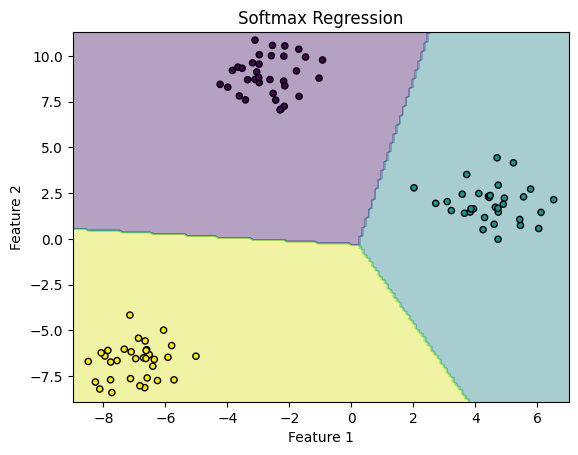

In [35]:
import matplotlib.pyplot as plt

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1,1), yy.reshape(-1,1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()